<a href="https://colab.research.google.com/github/somezzedup/EDA-Projects/blob/main/Automating_Crypto_Website_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Application Programming Interface (API) act as a intermediety between two application that wants to communicate with each other such as a client and server

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1abfc31b-545d-4739-998c-77f0c2ecb1be',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)

except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

  #NOTE:
  #Had to comment out print(data) because print statement exceeded more than 10MB

In [3]:
type(data)

dict

In [4]:
import pandas as pd


In [5]:
#Normalizes the data and organizes it in a dataframe
df =pd.json_normalize(data['data'])
#Takes the timestamp of program run and show it 
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.917833e+07,1.917833e+07,...,40.2605,4.070278e+11,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556
1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.227832e+08,1.227832e+08,...,17.1293,1.581407e+11,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556
2,825,Tether,USDT,tether,40773,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.842186e+10,7.014613e+10,...,7.4119,7.015253e+10,None,2022-10-14T00:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-14 00:03:06.963556
3,3408,USD Coin,USDC,usd-coin,6494,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.581579e+10,4.581579e+10,...,4.9622,4.581496e+10,None,2022-10-14T00:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-14 00:03:06.963556
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,...,4.7504,5.436653e+10,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.996418e+10,9.998927e+10,...,2.6005,4.806256e+10,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556
6,4687,Binance USD,BUSD,binance-usd,5266,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.162810e+10,2.162810e+10,...,2.3423,2.162827e+10,None,2022-10-14T00:01:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-14 00:03:06.963556
7,2010,Cardano,ADA,cardano,580,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.427904e+10,3.502610e+10,...,1.4018,1.699227e+10,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556
8,5426,Solana,SOL,solana,390,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.578672e+08,5.116169e+08,...,1.1835,1.562416e+10,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556
9,74,Dogecoin,DOGE,dogecoin,572,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.8572,7.915488e+09,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:06.963556


In [6]:

def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '1abfc31b-545d-4739-998c-77f0c2ecb1be',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)

  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

    #NOTE:
    #Had to comment out print(data) because print statement exceeded more than 10MB
    #Normalizes the data and organizes it in a dataframe
  
  df =pd.json_normalize(data['data']) 
  df['timestamp']=pd.to_datetime('now')
  #appends to orginal dataframe
  df 
  
  #putting it into CSV file 
  #check if there is a file already
  #if there is not a file with the name API.csv then we will create one and write to it
  if not os.path.isfile(r'C:\Users\mprot\OneDrive\Desktop\CSV\API.csv'):
    df.to_csv(r'C:\Users\mprot\OneDrive\Desktop\CSV\API.csv', header='column_names')
    #'a' means append
  else:
    df.to_csv(r'C:\Users\mprot\OneDrive\Desktop\CSV\API.csv', mode='a' , header = False)

    
    


    

In [7]:
#creating script to automatically run this 
import os 
from time import time
from time import sleep

#can only run 333 times per day
for i in range(1):
  api_runner()
  print('API Runner Completed')
  sleep(60) #sleep for 1 minute
exit()

API Runner Completed


In [8]:
df3 = pd.read_csv(r'C:\Users\mprot\OneDrive\Desktop\CSV\API.csv')

In [9]:
#to make circulating_supply and total_supply easily readable 
pd.set_option('display.float_format', lambda x :'%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19178331.00000,19178331.00000,...,40.26050,407027771256.46002,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548
1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122783239.49900,122783239.49900,...,17.12930,158140716138.92999,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548
2,825,Tether,USDT,tether,40773,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68421859091.16577,70146125804.35068,...,7.41190,70152527294.07001,None,2022-10-14T00:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-14 00:03:07.314548
3,3408,USD Coin,USDC,usd-coin,6494,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45815785195.51602,45815785195.51602,...,4.96220,45814962879.54000,None,2022-10-14T00:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-14 00:03:07.314548
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,...,4.75040,54366533820.62000,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49964184162.00000,99989267435.00000,...,2.60050,48062558919.57000,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548
6,4687,Binance USD,BUSD,binance-usd,5266,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,...,2.34230,21628271137.33000,None,2022-10-14T00:01:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-14 00:03:07.314548
7,2010,Cardano,ADA,cardano,580,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34279041125.91700,35026102954.65500,...,1.40180,16992265310.25000,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548
8,5426,Solana,SOL,solana,390,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,357867164.11900,511616946.14229,...,1.18350,15624155639.71000,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548
9,74,Dogecoin,DOGE,dogecoin,572,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,...,0.85720,7915488099.75000,None,2022-10-14T00:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-14 00:03:07.314548


In [10]:
df4 = df.groupby('name', sort = False) [['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                                  'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.26293,1.17794,-2.88254,-3.98901,-20.28063,-6.95189
Ethereum,-0.38386,-0.53139,-4.74071,-18.21899,-33.48876,4.51275
Tether,0.00111,0.00908,-0.00671,0.00611,-0.01502,0.03740
USD Coin,0.00312,-0.00020,-0.00704,0.00366,0.00966,0.02123
BNB,-0.49186,0.32075,-5.27113,-2.01363,-14.51673,13.93802
XRP,-1.19493,-1.57680,-2.56477,44.34967,27.76335,43.77581
Binance USD,-0.04474,-0.00681,-0.00395,-0.00246,0.01441,-0.14651
Cardano,-0.56472,-0.96990,-11.93832,-18.61111,-33.76714,-14.62550
Solana,-0.31331,-2.00301,-8.43479,-7.50192,-31.99012,-18.33008


In [11]:
#changing the columns to rows for easier visualization
df5 = df4.stack()
df5

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.26293
         quote.USD.percent_change_24h     1.17794
         quote.USD.percent_change_7d     -2.88254
         quote.USD.percent_change_30d    -3.98901
         quote.USD.percent_change_60d   -20.28063
                                           ...   
TRON     quote.USD.percent_change_24h    -1.25092
         quote.USD.percent_change_7d     -2.85657
         quote.USD.percent_change_30d     0.46837
         quote.USD.percent_change_60d   -13.33831
         quote.USD.percent_change_90d    -9.02612
Length: 90, dtype: float64

In [12]:
type(df5)

pandas.core.series.Series

In [13]:
df6 = df5.to_frame(name ='values')
df6

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.26293
        quote.USD.percent_change_24h   1.17794
        quote.USD.percent_change_7d   -2.88254
        quote.USD.percent_change_30d  -3.98901
        quote.USD.percent_change_60d -20.28063
...                                        ...
TRON    quote.USD.percent_change_24h  -1.25092
        quote.USD.percent_change_7d   -2.85657
        quote.USD.percent_change_30d   0.46837
        quote.USD.percent_change_60d -13.33831
        quote.USD.percent_change_90d  -9.02612

[90 rows x 1 columns]

In [14]:
type(df6)

pandas.core.frame.DataFrame

In [15]:
df6.count()

values    90
dtype: int64

In [16]:
#Need to give it a index so we are creating index
index = pd.Index(range(60))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26293
1,Bitcoin,quote.USD.percent_change_24h,1.17794
2,Bitcoin,quote.USD.percent_change_7d,-2.88254
3,Bitcoin,quote.USD.percent_change_30d,-3.98901
4,Bitcoin,quote.USD.percent_change_60d,-20.28063
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-1.25092
86,TRON,quote.USD.percent_change_7d,-2.85657
87,TRON,quote.USD.percent_change_30d,0.46837
88,TRON,quote.USD.percent_change_60d,-13.33831


In [17]:
df8 = df7.rename(columns ={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26293
1,Bitcoin,quote.USD.percent_change_24h,1.17794
2,Bitcoin,quote.USD.percent_change_7d,-2.88254
3,Bitcoin,quote.USD.percent_change_30d,-3.98901
4,Bitcoin,quote.USD.percent_change_60d,-20.28063
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-1.25092
86,TRON,quote.USD.percent_change_7d,-2.85657
87,TRON,quote.USD.percent_change_30d,0.46837
88,TRON,quote.USD.percent_change_60d,-13.33831


In [18]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h' ,'quote.USD.percent_change_24h' , 'quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.26293
1,Bitcoin,24h,1.17794
2,Bitcoin,7d,-2.88254
3,Bitcoin,30d,-3.98901
4,Bitcoin,60d,-20.28063
...,...,...,...
85,TRON,24h,-1.25092
86,TRON,7d,-2.85657
87,TRON,30d,0.46837
88,TRON,60d,-13.33831


In [19]:
import seaborn as sns
import matplotlib.pyplot as plot

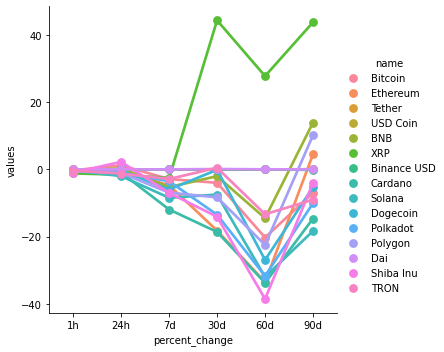

In [20]:
sns.catplot(x='percent_change', y='values',hue='name', data = df8, kind='point')

In [21]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,19382.27482,2022-10-14 00:03:07.314548
